In [69]:
import pandas as pd

from datetime import date

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

In [18]:
link_ts_counts = pd.read_json('../../data/domain-link-ts-counts.json/part-00000-9e1063a9-9847-4a0e-96fd-74c637882e67-c000.json', lines=True)

In [51]:
article_ts_counts = pd.read_json('../../data/domain-article-ts-counts.json/part-00000-edd2a29f-0be2-4ebc-bb4f-6e95f5afdc43-c000.json', lines=True)

In [71]:
imp_ts_counts = pd.read_json('../../data/domain-imp-ts-counts.json/part-00000-fb29a2f7-5c24-4ab2-bc6e-3fe1b019a902-c000.json', lines=True)
imp_ts_counts = imp_ts_counts.rename(columns={'imp': 'count'})

In [99]:
def plot_domain(df, domain, w=10, h=3, dpi=100, title=None, dst=None):
    
    pdf = df[(df.domain==domain)&(df.year >= 2017)].copy()
    pdf['date'] = pdf.apply(lambda r: date(r.year, r.month, r.day), 1)
    pdf = pdf.sort_values('date')
    
    plt.figure(figsize=(10,3), dpi=dpi)
    
    if title:
        plt.title(title)

    plt.bar(pdf.date.unique(), pdf['count'], linewidth=0, width=1)
    plt.show()
    
    if dst:
        plt.savefig(dst)

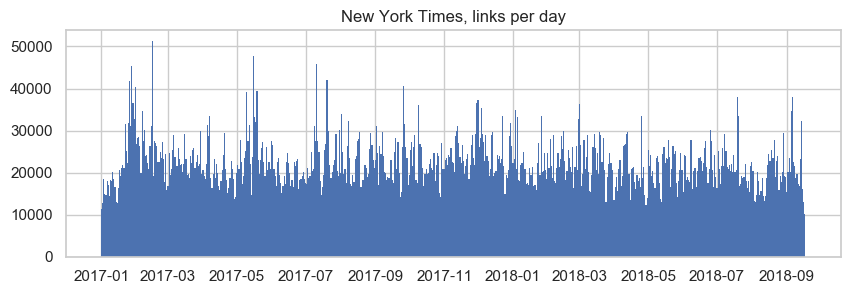

<Figure size 432x288 with 0 Axes>

In [101]:
plot_domain(link_ts_counts, 'nytimes.com', title='New York Times, links per day', dst='figures/nyt-articles-per-day.png')

In [66]:
nyt = imp_ts_counts[imp_ts_counts.domain=='truepundit.com'].copy()

In [67]:
nyt['date'] = nyt.apply(lambda r: date(r.year, r.month, r.day), 1)
nyt = nyt.sort_values('date')

<BarContainer object of 635 artists>

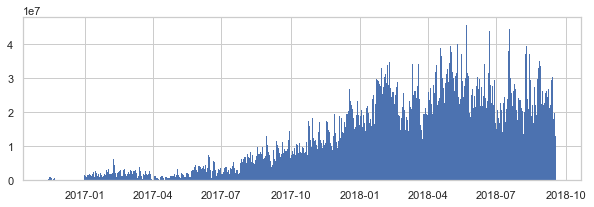

In [68]:
plt.figure(figsize=(10,3))
plt.bar(nyt.date.unique(), nyt['imp'], linewidth=0, width=1)